# 1.データの取り込み・確認

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font="Hiragino Sans")
pd.set_option("display.max_columns",150)

In [43]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
display(train.head())
display(test.head())

,index,Name,Platform,Year_of_Release,Genre,Publisher,JP_Sales,Critic_Score,Critic_Count,Global_Sales
0,12675,Mayhem 3D,PS3,2011.0,Racing,Evolved Games,0.00,53.0,5.0,0.06
1,7025,Wipeout 2,3DS,2011.0,Misc,Activision,0.00,NaN,NaN,0.23
2,11557,Bleach: Erabareshi Tamashii,PS2,2005.0,Adventure,Sony Computer Entertainment,0.08,NaN,NaN,0.08
3,11746,Rayman Origins,PC,2012.0,Platform,Ubisoft,0.00,86.0,11.0,0.08
4,16042,Oyaku de Asoberu DS Ehon: Ukkari Penelope,DS,2008.0,Simulation,Tecmo Koei,0.02,NaN,NaN,0.02


,index,Name,Platform,Year_of_Release,Genre,Publisher,JP_Sales,Critic_Score,Critic_Count
0,7941,R-Type Final,PS2,2003.0,Shooter,Metro 3D,0.00,79.0,50.0
1,4711,The Terminator: Dawn of Fate,PS2,2002.0,Action,Atari,0.00,58.0,17.0
2,6171,Dead to Rights: Retribution,PS3,2010.0,Shooter,Namco Bandai Games,0.02,60.0,44.0
3,766,Skylanders SWAP Force,Wii,2013.0,Platform,Activision,0.00,NaN,NaN
4,1963,DiRT,PS3,2007.0,Racing,Codemasters,0.00,83.0,32.0


# 2.データの探索(eda)

In [44]:
print("----------------train---------------------")
print(train.info())
print(train.describe(include="object"))
print(train.describe())
print(train.isnull().sum())
print(train.shape)
print("----------------test---------------------")
print(test.info())
print(train.describe(include="object"))
#print(test.describe())
print(test.isnull().sum())
print(test.shape)

----------------train---------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13375 entries, 0 to 13374
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            13375 non-null  int64  
 1   Name             13373 non-null  object 
 2   Platform         13375 non-null  object 
 3   Year_of_Release  13171 non-null  float64
 4   Genre            13373 non-null  object 
 5   Publisher        13335 non-null  object 
 6   JP_Sales         13375 non-null  float64
 7   Critic_Score     6487 non-null   float64
 8   Critic_Count     6487 non-null   float64
 9   Global_Sales     13375 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.0+ MB
None
                               Name Platform   Genre        Publisher
count                         13373    13375   13373            13335
unique                         9711       31      12              542
top     Need for Sp

## 2-0.Global_Sales

<Axes: xlabel='Global_Sales', ylabel='Count'>

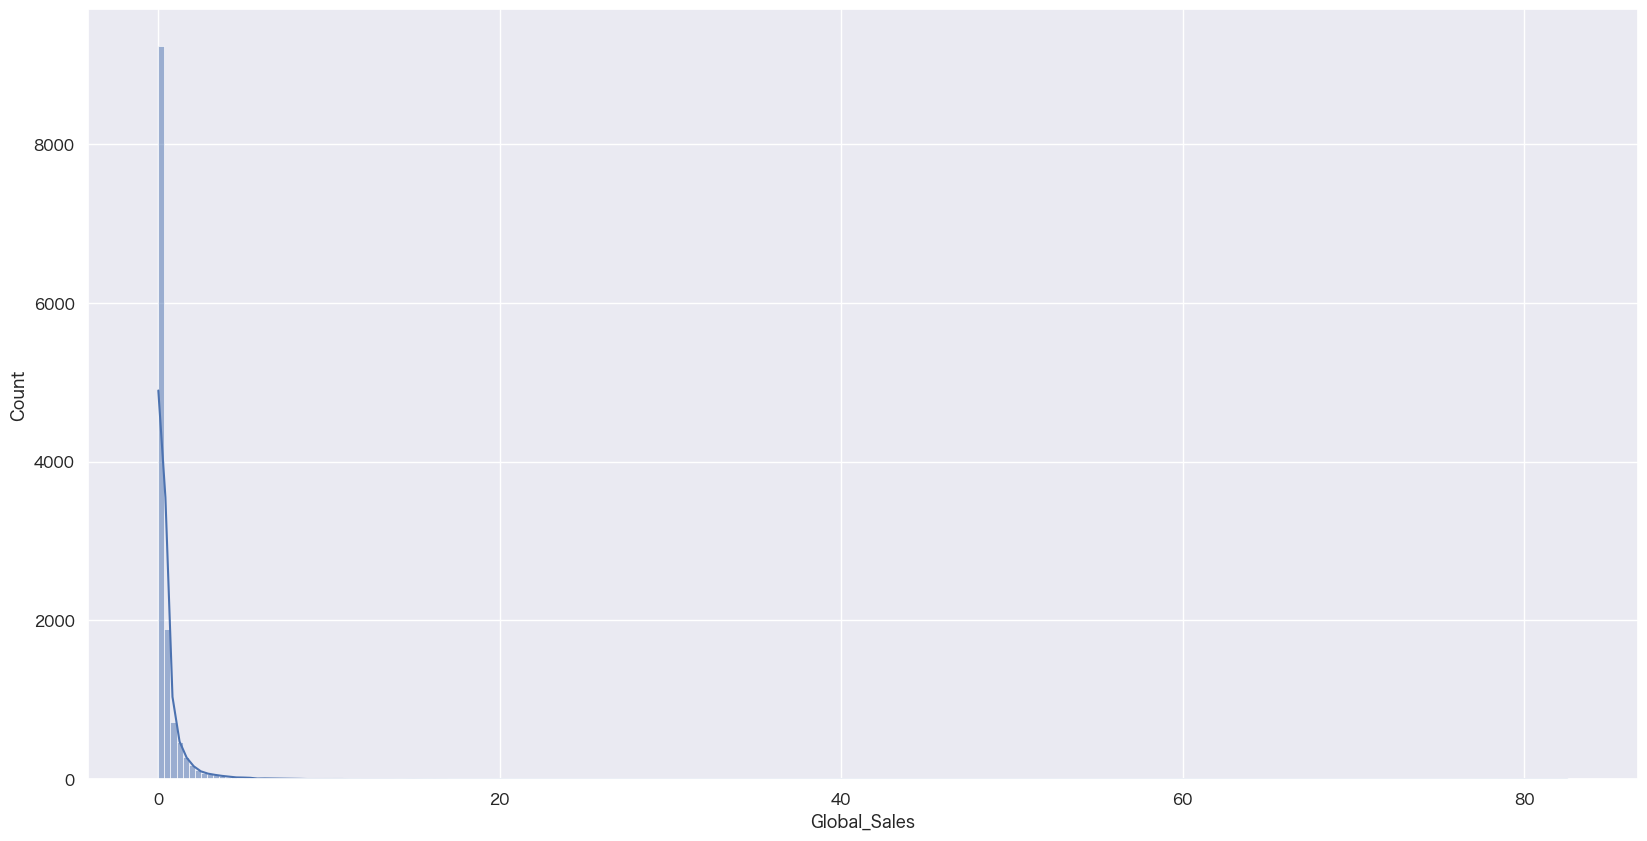

In [45]:
# 2-0.Global_Salesの確認

fig = plt.subplots(figsize=(20,10))
sns.histplot(train["Global_Sales"], kde=True)
# ボリュームゾーンは0.1以下であることを考えると、外れ値である売上を大きく上げる製品をどれくらい正確に予測できるかがポイント

<Axes: xlabel='Global_Sales', ylabel='Density'>

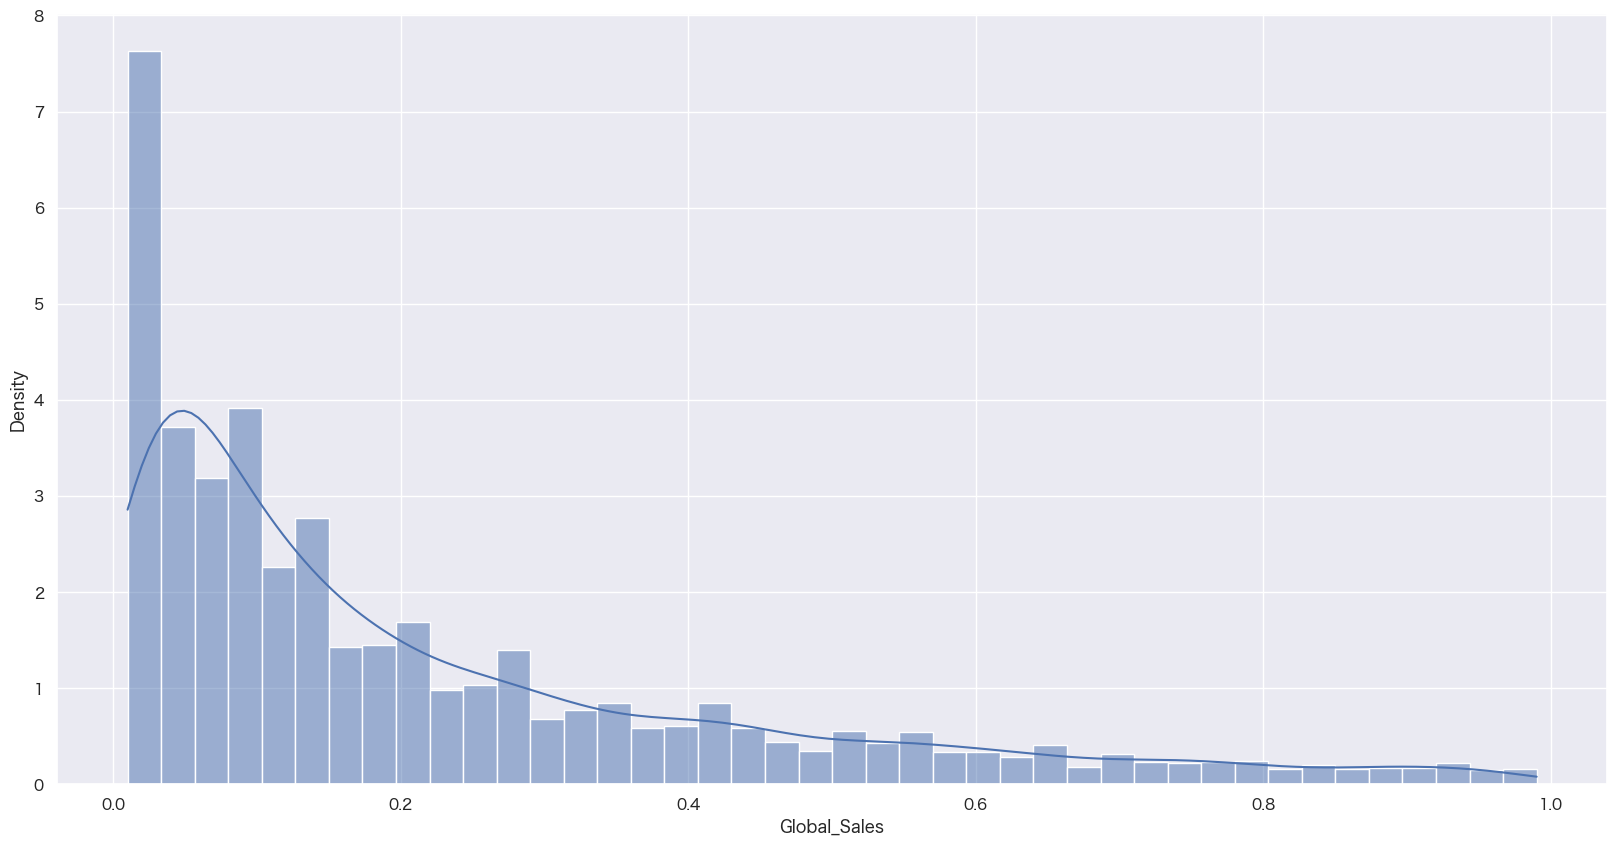

In [46]:
# Global_Sales(1.0以下飲み除去)
fig = plt.subplots(figsize=(20,10))
sns.histplot(train.query("Global_Sales < 1.0")["Global_Sales"],kde=True,stat="density")
# 

## 2-1.Name

In [47]:
# Name ほとんどが1データしか持っていないため2行以上データがあるNameだけを抽出
df_cnt = train.groupby("Name", as_index=False).count().query('index > 1')[["Name", "index"]]
df_avg = train.groupby("Name", as_index=False)[["Global_Sales"]].mean()
pd.merge(df_cnt, df_avg, on="Name", how="left").sort_values("Global_Sales", ascending=False)

,Name,index,Global_Sales
694,Grand Theft Auto V,4,8.882500
266,Call of Duty: Modern Warfare 2,3,8.316667
267,Call of Duty: Modern Warfare 3,2,8.225000
698,Grand Theft Auto: Vice City,2,8.095000
261,Call of Duty: Black Ops,4,7.560000
...,...,...,...
59,Aquaman: Battle for Atlantis,2,0.010000
1543,Sakura-Sou no Pet na Kanojo,2,0.010000
518,Dynasty Warriors: Eiketsuden,2,0.010000
32,Akatsuki no Goei Trinity,2,0.010000


In [48]:
# 先ほど抽出したNameから、平均Glboal_Salesの高いNameの生データをチェック
display(train.query('Name == "Grand Theft Auto V"'))
display(train.query('Name == "Call of Duty: Modern Warfare 2"'))
display(train.query('Name == "Grand Theft Auto: Vice City"'))

# PC除けば同じNameならGlobal_Salesが近くなる印象、貪欲にデータを使うなら複数データがあるNameのみを使用して特長料として試酔いするのもあり
# ただしデータが少ない分、過学習の恐れもあるため今回はNameは使用しない方向で考える

,index,Name,Platform,Year_of_Release,Genre,Publisher,JP_Sales,Critic_Score,Critic_Count,Global_Sales
350,42,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,0.38,97.0,66.0,12.61
2679,1730,Grand Theft Auto V,PC,2015.0,Action,Take-Two Interactive,0.00,96.0,57.0,1.17
3294,23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,0.06,97.0,58.0,16.27
12308,165,Grand Theft Auto V,XOne,2014.0,Action,Take-Two Interactive,0.00,97.0,14.0,5.48


,index,Name,Platform,Year_of_Release,Genre,Publisher,JP_Sales,Critic_Score,Critic_Count,Global_Sales
3356,36,Call of Duty: Modern Warfare 2,X360,2009.0,Shooter,Activision,0.08,94.0,100.0,13.47
3429,2356,Call of Duty: Modern Warfare 2,PC,2009.0,Shooter,Activision,0.00,86.0,40.0,0.88
10855,55,Call of Duty: Modern Warfare 2,PS3,2009.0,Shooter,Activision,0.38,94.0,67.0,10.60


,index,Name,Platform,Year_of_Release,Genre,Publisher,JP_Sales,Critic_Score,Critic_Count,Global_Sales
209,13876,Grand Theft Auto: Vice City,PC,2003.0,Action,Take-Two Interactive,0.00,94.0,30.0,0.04
6812,24,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,0.47,95.0,62.0,16.15


In [49]:
# Nameの欠損の調査
train.query("Name != Name")
#train[train["Name"].isna()]
#両方の書き方があるよ。
#で表示している2行目の方が推奨だが、講義に沿って1行目を表示

#Genreとケソンが共通、PublishとYearが共通なのでたまたまはなさそう、subnitデータに同じ欠損データがないので、学習する必要なし、、削除の方向で検討

,index,Name,Platform,Year_of_Release,Genre,Publisher,JP_Sales,Critic_Score,Critic_Count,Global_Sales
9392,659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.00,NaN,NaN,2.39
10467,14246,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.03,NaN,NaN,0.03


## 2-2.Platform

Platform,GB,NES,GEN,2600,SNES,PS4,X360,Wii,XOne,PS3,N64,PS,PS2,WiiU,3DS,DS,GBA,SCD,GC,DC,XB,PC,PSP,WS,SAT,TG16,PSV,NG,GG,3DO,PCFX
count,77.000000,83.000000,22.000000,108.000000,200.00000,298.000000,1013.000000,1048.000000,199.000000,1052.000000,248.000000,979.000000,1729.000000,110.000000,418.000000,1739.000000,619.000000,5.000000,442.000000,35.000000,668.000000,792.000000,973.000000,5.000000,147.000000,1.00,351.000000,9.000000,1.00,3.000000,1.00
mean,2.453896,2.305542,1.221818,0.796759,0.77930,0.765705,0.742142,0.733149,0.670854,0.667956,0.656371,0.609050,0.596877,0.559091,0.499450,0.395877,0.378627,0.364000,0.349118,0.326000,0.316467,0.281035,0.238366,0.228000,0.191701,0.14,0.121168,0.114444,0.04,0.033333,0.03
std,5.398758,4.716231,1.610843,0.999200,1.44431,1.480537,1.623443,3.382355,1.081003,1.224314,1.204416,1.060439,1.185203,1.108480,1.400668,1.554180,0.946529,0.636027,0.631605,0.424944,0.554026,0.708042,0.525196,0.176692,0.214417,NaN,0.202324,0.076503,NaN,0.023094,NaN
min,0.060000,0.070000,0.030000,0.070000,0.01000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.050000,0.010000,0.040000,0.010000,0.010000,0.010000,0.030000,0.020000,0.14,0.010000,0.030000,0.04,0.020000,0.03
25%,0.300000,1.000000,0.070000,0.310000,0.12750,0.060000,0.110000,0.090000,0.060000,0.110000,0.110000,0.110000,0.080000,0.080000,0.050000,0.050000,0.050000,0.060000,0.070000,0.085000,0.070000,0.020000,0.030000,0.170000,0.080000,0.14,0.020000,0.060000,0.04,0.020000,0.03
50%,1.140000,1.270000,0.205000,0.480000,0.32000,0.190000,0.280000,0.195000,0.220000,0.270000,0.270000,0.260000,0.240000,0.230000,0.120000,0.100000,0.160000,0.070000,0.150000,0.140000,0.145000,0.050000,0.090000,0.180000,0.120000,0.14,0.050000,0.080000,0.04,0.020000,0.03
75%,1.990000,2.145000,1.805000,0.885000,0.71500,0.737500,0.720000,0.480000,0.690000,0.740000,0.582500,0.660000,0.570000,0.502500,0.340000,0.280000,0.390000,0.140000,0.370000,0.345000,0.352500,0.180000,0.230000,0.250000,0.255000,0.14,0.130000,0.200000,0.04,0.040000,0.03
max,31.370000,40.240000,6.030000,7.810000,10.55000,12.610000,21.810000,82.530000,7.390000,13.790000,9.870000,10.950000,20.810000,7.090000,12.660000,29.800000,15.850000,1.500000,7.070000,1.810000,8.490000,8.010000,7.690000,0.510000,1.930000,0.14,1.960000,0.230000,0.04,0.060000,0.03


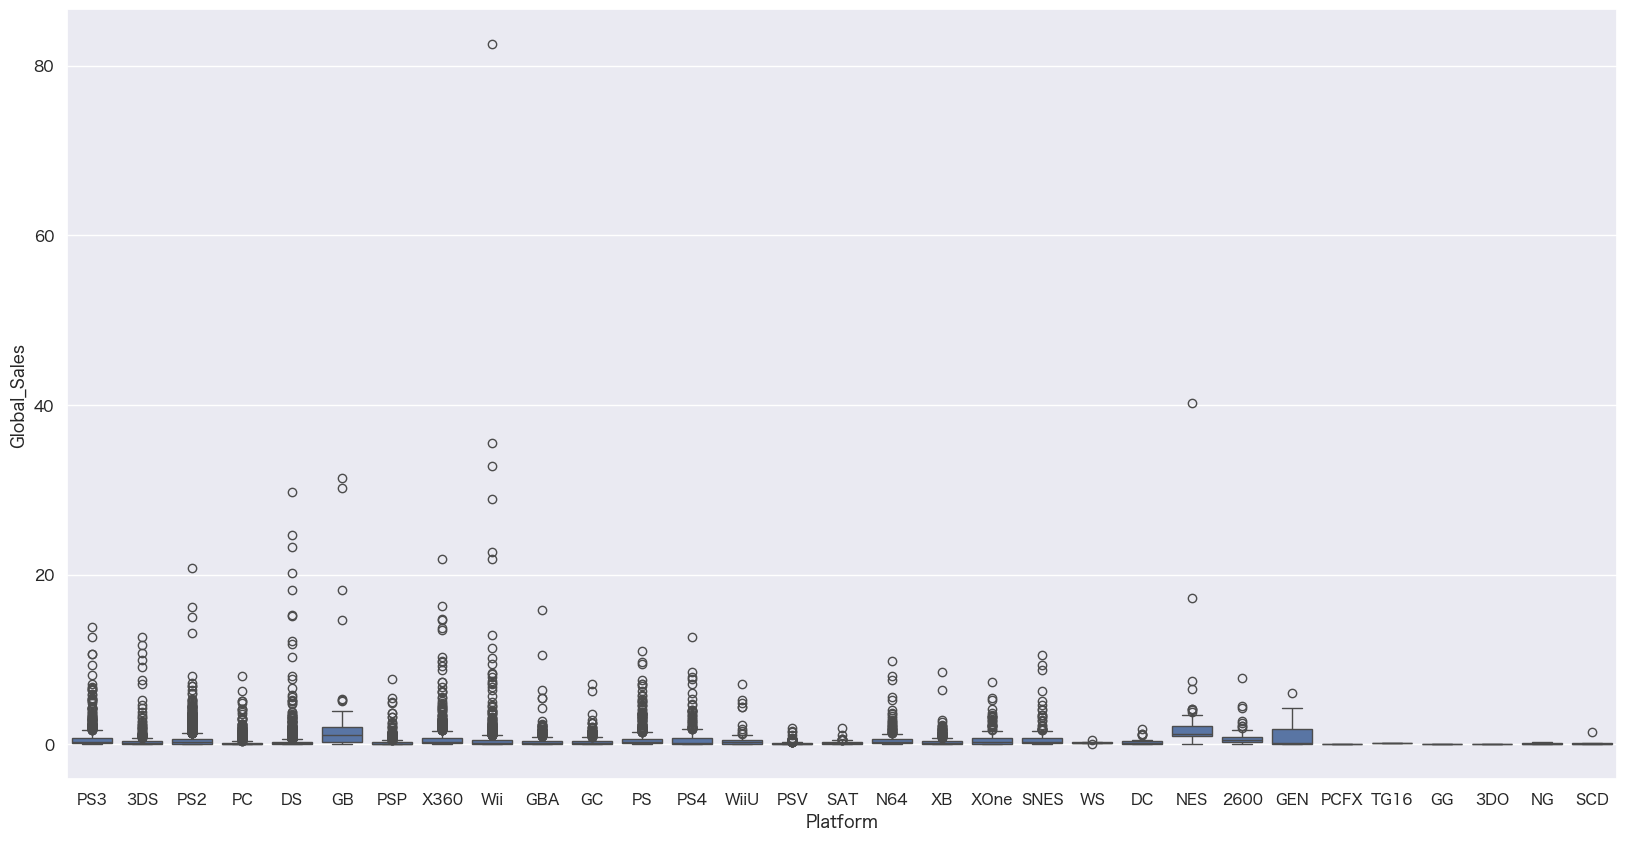

In [50]:
#Platform
fig = plt.subplots(figsize=(20,10))

sns.boxplot(x="Platform",y="Global_Sales",data=train)
train.groupby("Platform").describe()["Global_Sales"].sort_values("mean",ascending=False).T

# 20くらいまでなら多くのPlatformで達成可能だが、、それ以上は一部のplatform(ds,gb,wii,nes)に限られている
# 高く売れるポテンシャルを持つPlatformの重みを大きくしたいので、各Platformの平均値を用いてtarget encodingを実施することを検討

## 2-3.Year_of_Release

Year_of_Release
1980.0    1.050
1981.0    0.590
1982.0    0.540
1983.0    0.775
1984.0    1.360
1985.0    1.040
1986.0    1.430
1987.0    0.840
1988.0    1.510
1989.0    1.940
1990.0    1.440
1991.0    0.380
1992.0    0.580
1993.0    0.360
1994.0    0.270
1995.0    0.150
1996.0    0.210
1997.0    0.290
1998.0    0.270
1999.0    0.290
2000.0    0.260
2001.0    0.240
2002.0    0.180
2003.0    0.190
2004.0    0.220
2005.0    0.170
2006.0    0.100
2007.0    0.155
2008.0    0.160
2009.0    0.150
2010.0    0.150
2011.0    0.130
2012.0    0.170
2013.0    0.180
2014.0    0.160
2015.0    0.100
2016.0    0.060
2017.0    0.010
2020.0    0.290
Name: Global_Sales, dtype: float64

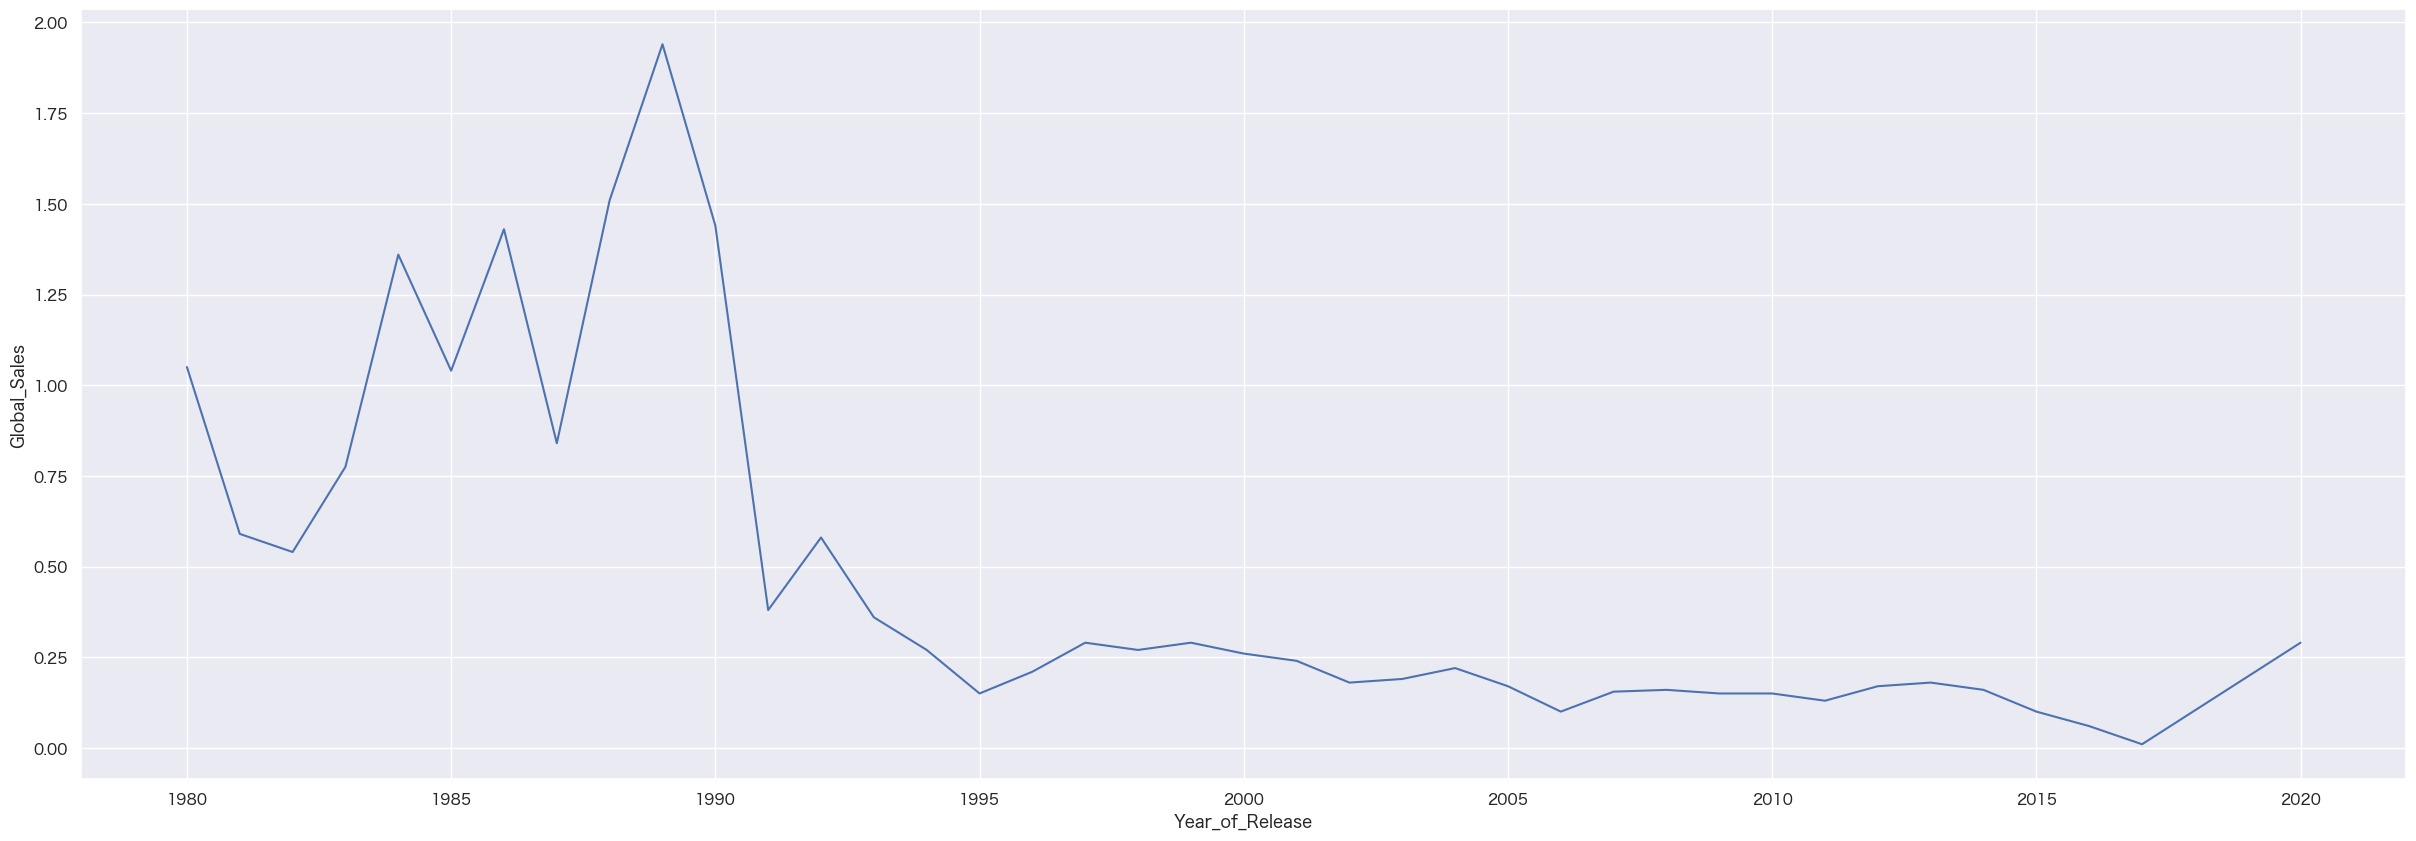

In [51]:
# Year_of_Release
df_graph = train.groupby("Year_of_Release",as_index=False)[["Year_of_Release","Global_Sales"]].median()
fig = plt.subplots(figsize=(30,10))
sns.lineplot(x="Year_of_Release",y="Global_Sales",data=df_graph)
train.groupby("Year_of_Release")["Global_Sales"].median()

# 1990〜１９９５付近に大きな変動あり。バブル崩壊などが関連しているのかもしれない。もしくは古いデータは売れたものしか残っていない可能性も考えられる
# year<=1990,1990＜year< 1994、1994<=year、欠損、でダミー変数かするのが良さそう

## 2-4.Genre

Genre,Platform,Shooter,Role-Playing,Racing,Sports,Fighting,Action,Simulation,Misc,Puzzle,Strategy,Adventure
count,720.000000,1078.000000,1198.000000,977.000000,1892.000000,687.000000,2691.000000,695.000000,1390.000000,467.000000,539.000000,1039.000000
mean,0.894694,0.753200,0.620693,0.595548,0.577183,0.535735,0.518149,0.471381,0.469835,0.412848,0.248609,0.171761
std,2.471357,1.608223,1.690698,1.792272,2.279598,1.003466,1.109360,1.288351,1.402612,1.681713,0.476488,0.394775
min,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.090000,0.080000,0.070000,0.070000,0.090000,0.080000,0.070000,0.060000,0.060000,0.040000,0.040000,0.020000
50%,0.265000,0.230000,0.180000,0.180000,0.220000,0.190000,0.190000,0.160000,0.150000,0.110000,0.090000,0.050000
75%,0.772500,0.690000,0.520000,0.500000,0.560000,0.550000,0.495000,0.430000,0.390000,0.305000,0.270000,0.155000
max,40.240000,14.730000,31.370000,35.520000,82.530000,12.840000,20.810000,24.670000,28.920000,30.260000,4.840000,5.540000


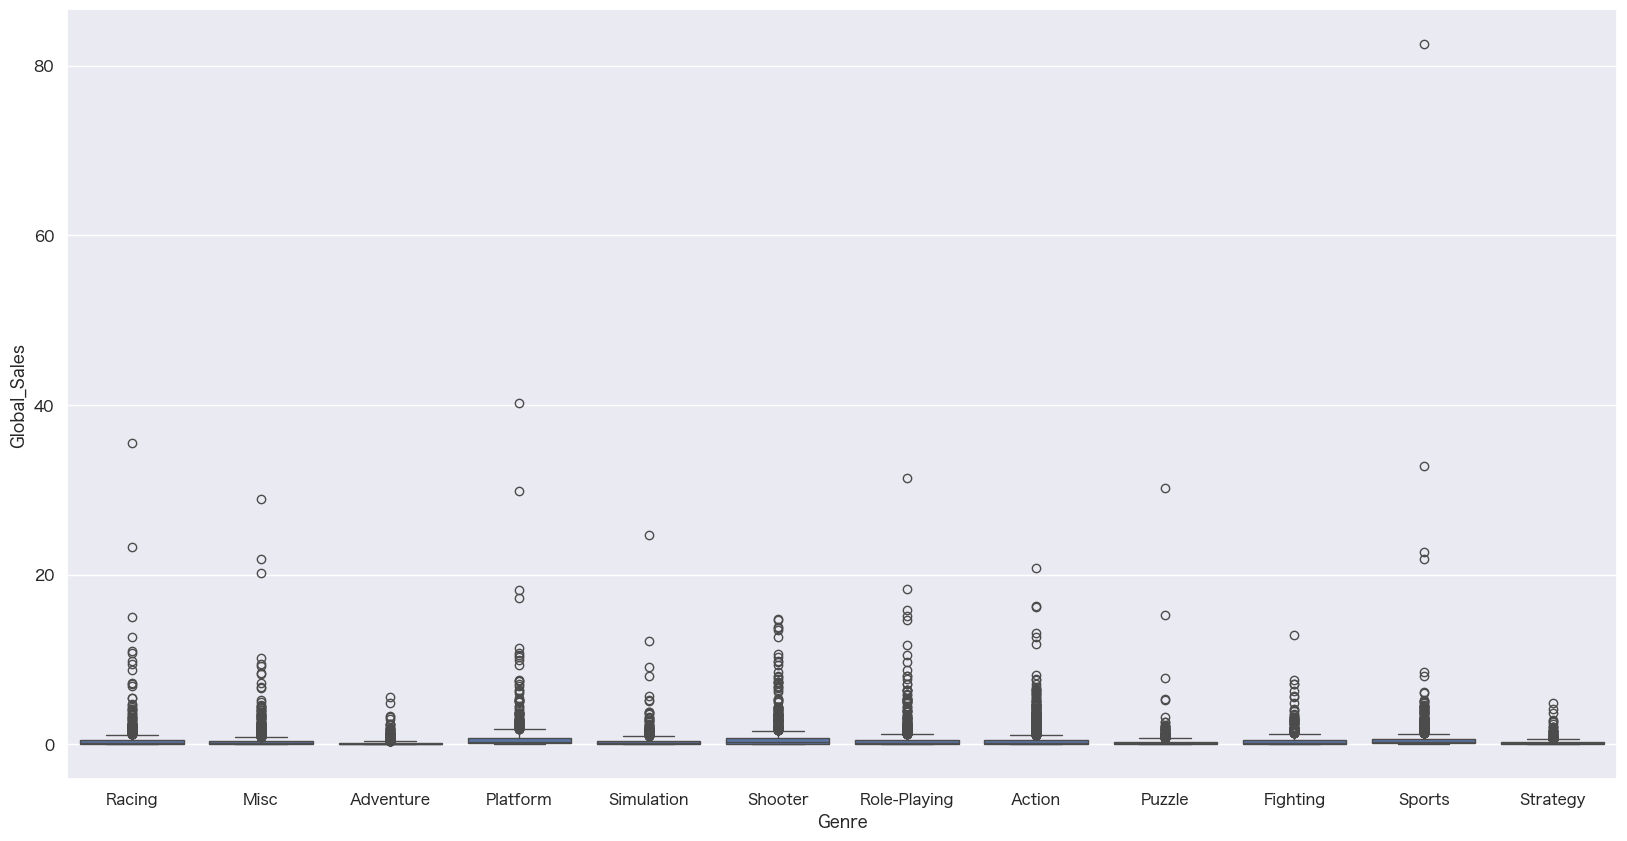

In [52]:

fig = plt.subplots(figsize=(20,10))
sns.boxplot(x="Genre",y="Global_Sales",data=train)
train.groupby("Genre").describe()["Global_Sales"].sort_values("mean",ascending=False).T

# Genreだけで比較すると際立って高いGenreはなさそう。ダミー変数化も検討

## 2-5.Publisher

,Publisher,index,Global_Sales
23,Nintendo,570,2.532281
20,Microsoft Game Studios,141,1.374326
6,Bethesda Softworks,64,1.110156
18,LucasArts,80,1.019375
30,Take-Two Interactive,338,0.906538
27,Sony Computer Entertainment,551,0.876697
14,Electronic Arts,1092,0.812473
2,Activision,803,0.749465
34,Virgin Interactive,53,0.743208
36,Warner Bros. Interactive Entertainment,183,0.698907


<Axes: xlabel='Publisher', ylabel='Global_Sales'>

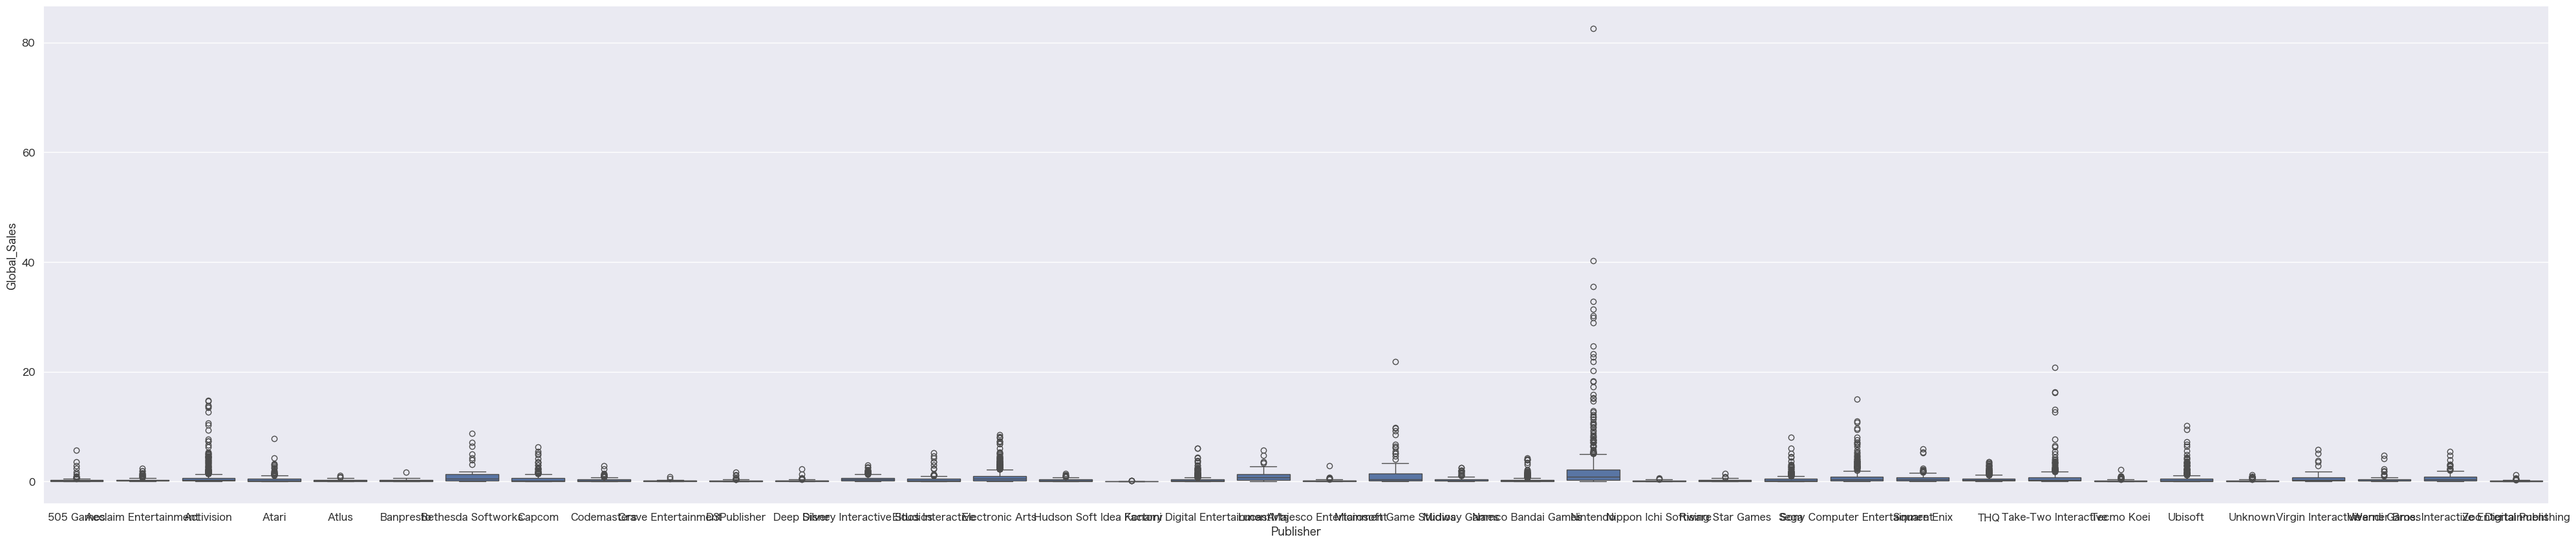

In [53]:
# Publisher
df_cnt = train.groupby("Publisher",as_index=False).count().query('index > 50')[["Publisher", "index"]]
df_avg = train.groupby("Publisher", as_index=False)["Global_Sales"].mean()
# df_avg = train.groupby("Publisher",as_index=False).mean()[["Publisher", "Global_Sales"]]
display(pd.merge(df_cnt, df_avg, on = "Publisher",how = "left").sort_values("Global_Sales",ascending=False))

df_graph = pd.merge(train,df_cnt, on = "Publisher",how = "right")
fig = plt.subplots(figsize=(50,10))
sns.boxplot(x="Publisher",y="Global_Sales",data=df_graph)

# Publisherが売上に関係していそう、target_encodingを検討

In [54]:
# Publisher欠損の調査
display(train.query('Publisher != Publisher').head(10))
train.query('Publisher != Publisher').describe()

# Publisherが欠損しているものは売上が低い傾向がある(売上の最大値が3.0しかない)
# 欠損には何かしらの条件があることが推察されるため、欠損情報おを一つのカテゴリーとして扱うことを検討

,index,Name,Platform,Year_of_Release,Genre,Publisher,JP_Sales,Critic_Score,Critic_Count,Global_Sales
477,16019,Dream Dancer,DS,NaN,Misc,NaN,0.00,NaN,NaN,0.02
584,3159,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.00,NaN,NaN,0.64
725,3755,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.00,NaN,NaN,0.53
1191,9511,Farming Simulator 2011,PC,2010.0,Simulation,NaN,0.00,NaN,NaN,0.13
1218,8328,Codename: Kids Next Door: Game Boy Advance Vid...,GBA,2004.0,Misc,NaN,0.00,NaN,NaN,0.17
1720,11546,Cartoon Network Collection: Game Boy Advance V...,GBA,2004.0,Misc,NaN,0.00,NaN,NaN,0.08
2197,15340,Mario Tennis,3DS,NaN,Sports,NaN,0.02,NaN,NaN,0.02
2211,15024,Umineko no Naku Koro ni San: Shinjitsu to Gens...,PS3,NaN,Adventure,NaN,0.02,NaN,NaN,0.02
2319,8317,Dragon Ball GT: Game Boy Advance Video Volume 1,GBA,2004.0,Misc,NaN,0.00,NaN,NaN,0.17
2583,14687,World of Tanks,X360,NaN,Shooter,NaN,0.00,NaN,NaN,0.03


,index,Year_of_Release,JP_Sales,Critic_Score,Critic_Count,Global_Sales
count,40.000000,22.000000,40.000000,3.000000,3.000000,40.000000
mean,10494.750000,2006.409091,0.012500,61.666667,27.000000,0.261250
std,4893.726716,3.984005,0.030277,22.052967,19.078784,0.526776
min,475.000000,2004.000000,0.000000,43.000000,15.000000,0.010000
25%,7099.500000,2004.000000,0.000000,49.500000,16.000000,0.020000
50%,10058.500000,2004.000000,0.000000,56.000000,17.000000,0.115000
75%,15103.000000,2008.750000,0.010000,71.000000,33.000000,0.225000
max,16662.000000,2016.000000,0.140000,86.000000,49.000000,3.000000


## 2-6.JP_Sales

PearsonRResult(statistic=np.float64(0.6169461327350617), pvalue=np.float64(0.0))

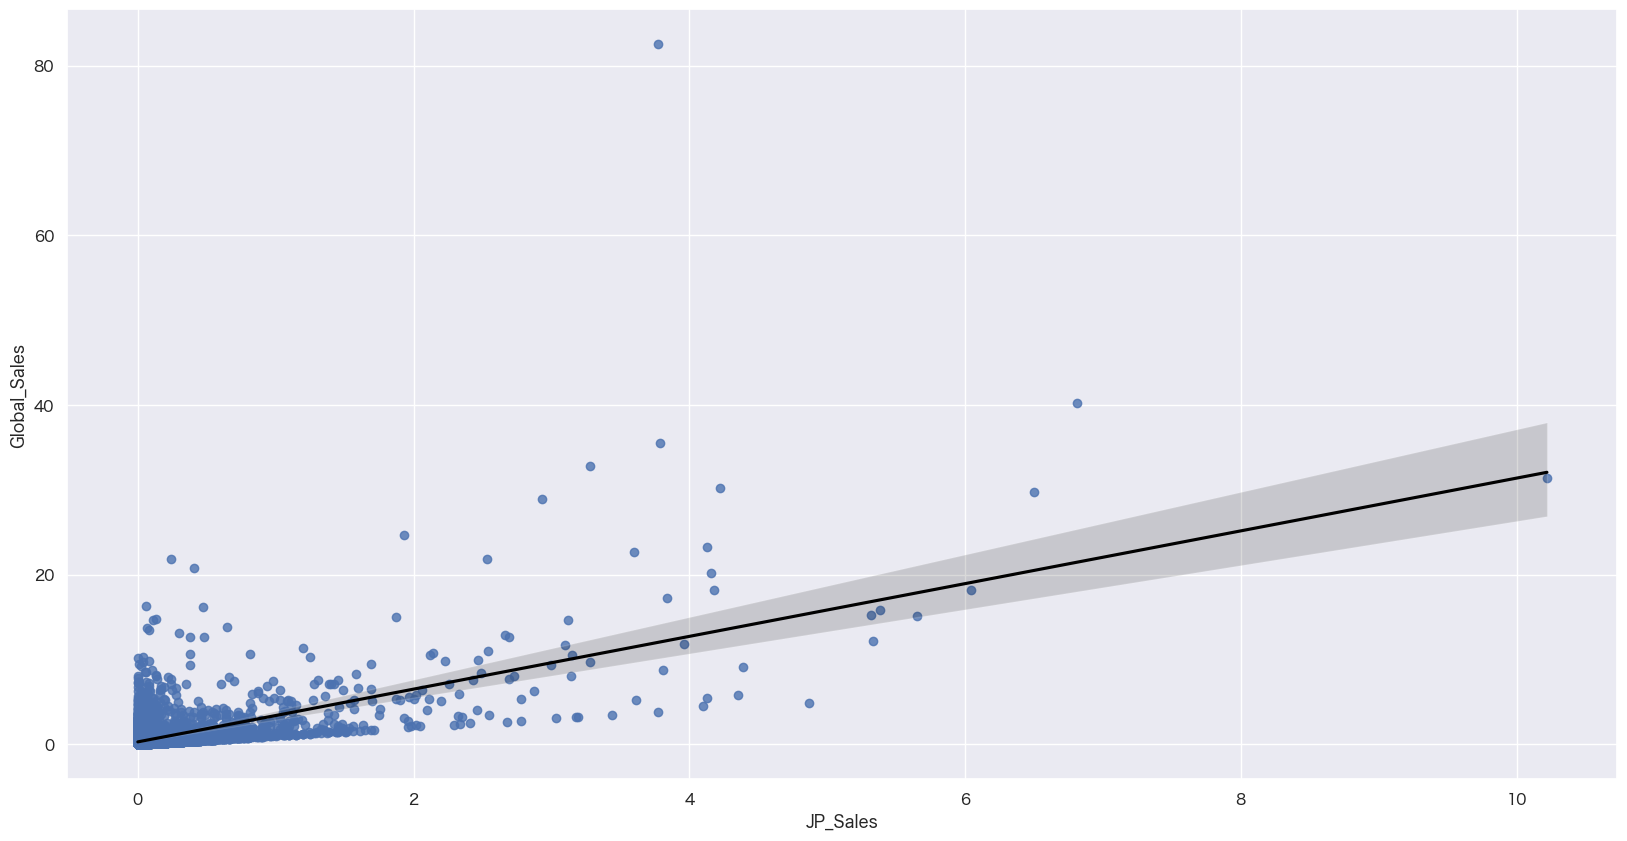

In [55]:
# JP_Sales
fig = plt.subplots(figsize=(20,10))
sns.regplot(x="JP_Sales",y="Global_Sales",data=train,line_kws={"color":"black"})

# 相関係数の算出 + 検定の実施
from scipy import stats
stats.pearsonr(train["JP_Sales"],train["Global_Sales"])

#強めの正の相関あり、このまま特長料として使用

## 2-7.Critic_Score

PearsonRResult(statistic=np.float64(0.23362355855830874), pvalue=np.float64(3.887901988823287e-81))

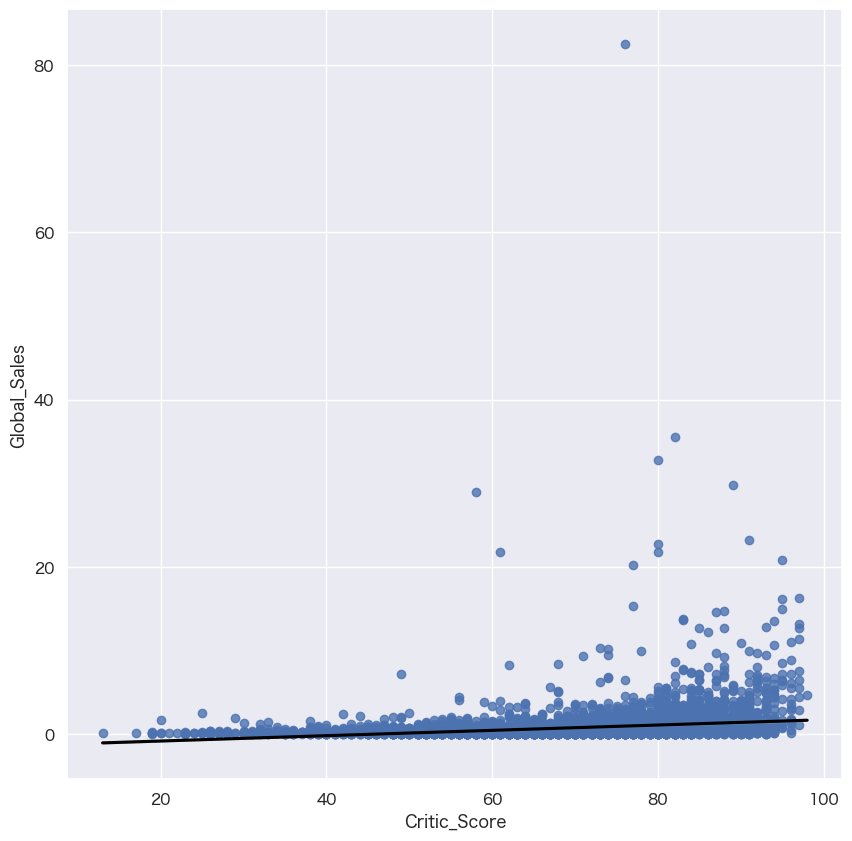

In [56]:
# Critic_Score(レビュー)
fig = plt.subplots(figsize=(10,10))
sns.regplot(x="Critic_Score",y="Global_Sales",data=train,line_kws={"color":"black"})

# 相関係数の算出 + 検定の実施
from scipy import stats
stats.pearsonr(train.query('Critic_Score == Critic_Score')["Critic_Score"],
               train.query('Critic_Score == Critic_Score')['Global_Sales'])

In [57]:
#Critic_Score欠損の調査 (欠損値と欠損値ではないグループで差異があるか確認)
df_critic_na = train[["Global_Sales","Critic_Score"]]
df_critic_na["Critic_na"] = train["Critic_Score"].apply(lambda x:"na" if x != x else "fill") 
#df_critic_na.loc[:, "Critic_na"] = train["Critic_Score"].apply(lambda x: "na" if x != x else "fill")
# df_critic_na = train[train['Critic_Score'].notna()].copy()
# df_critic_na["Critic_na"] = train["Critic_Score"].apply(lambda x: "na" if x != x else "fill")


display(df_critic_na.groupby("Critic_na").describe()["Global_Sales"].T)
display(train.query('Critic_Score != Critic_Score').head(10))

# 欠損のデータはレビューのないデータであることが推察される
# レビューがないグループの方が売上が低い傾向にあり、欠損を平均値で埋めつつ特徴量として追加する方法を検討

/var/folders/gv/jdl3jb_n5_n7dmjltlz8wbm40000gn/T/ipykernel_80599/388882445.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_critic_na["Critic_na"] = train["Critic_Score"].apply(lambda x:"na" if x != x else "fill")


Critic_na,fill,na
count,6487.000000,6888.000000
mean,0.698001,0.376948
std,1.902459,1.180042
min,0.010000,0.010000
25%,0.100000,0.040000
50%,0.250000,0.110000
75%,0.650000,0.320000
max,82.530000,40.240000


,index,Name,Platform,Year_of_Release,Genre,Publisher,JP_Sales,Critic_Score,Critic_Count,Global_Sales
1,7025,Wipeout 2,3DS,2011.0,Misc,Activision,0.00,NaN,NaN,0.23
2,11557,Bleach: Erabareshi Tamashii,PS2,2005.0,Adventure,Sony Computer Entertainment,0.08,NaN,NaN,0.08
4,16042,Oyaku de Asoberu DS Ehon: Ukkari Penelope,DS,2008.0,Simulation,Tecmo Koei,0.02,NaN,NaN,0.02
6,1856,The Final Fantasy Legend,GB,1989.0,Role-Playing,SquareSoft,1.10,NaN,NaN,1.10
7,9322,Medalot 7,3DS,2012.0,Action,Rocket Company,0.13,NaN,NaN,0.13
9,12711,Aquarium by DS,DS,2008.0,Simulation,Mercury Games,0.00,NaN,NaN,0.06
12,2658,Puzzler World,DS,2009.0,Puzzle,Ubisoft,0.00,NaN,NaN,0.77
13,6204,Thief (2014),X360,2014.0,Action,Square Enix,0.00,NaN,NaN,0.28
14,9473,Grand Knights History,PSP,2011.0,Role-Playing,Marvelous Interactive,0.13,NaN,NaN,0.13
15,13707,Unison: Rebels of Rhythm & Dance,PS2,2000.0,Misc,Tecmo Koei,0.00,NaN,NaN,0.04


PearsonRResult(statistic=np.float64(0.24094495387873555), pvalue=np.float64(6.023009962427713e-176))

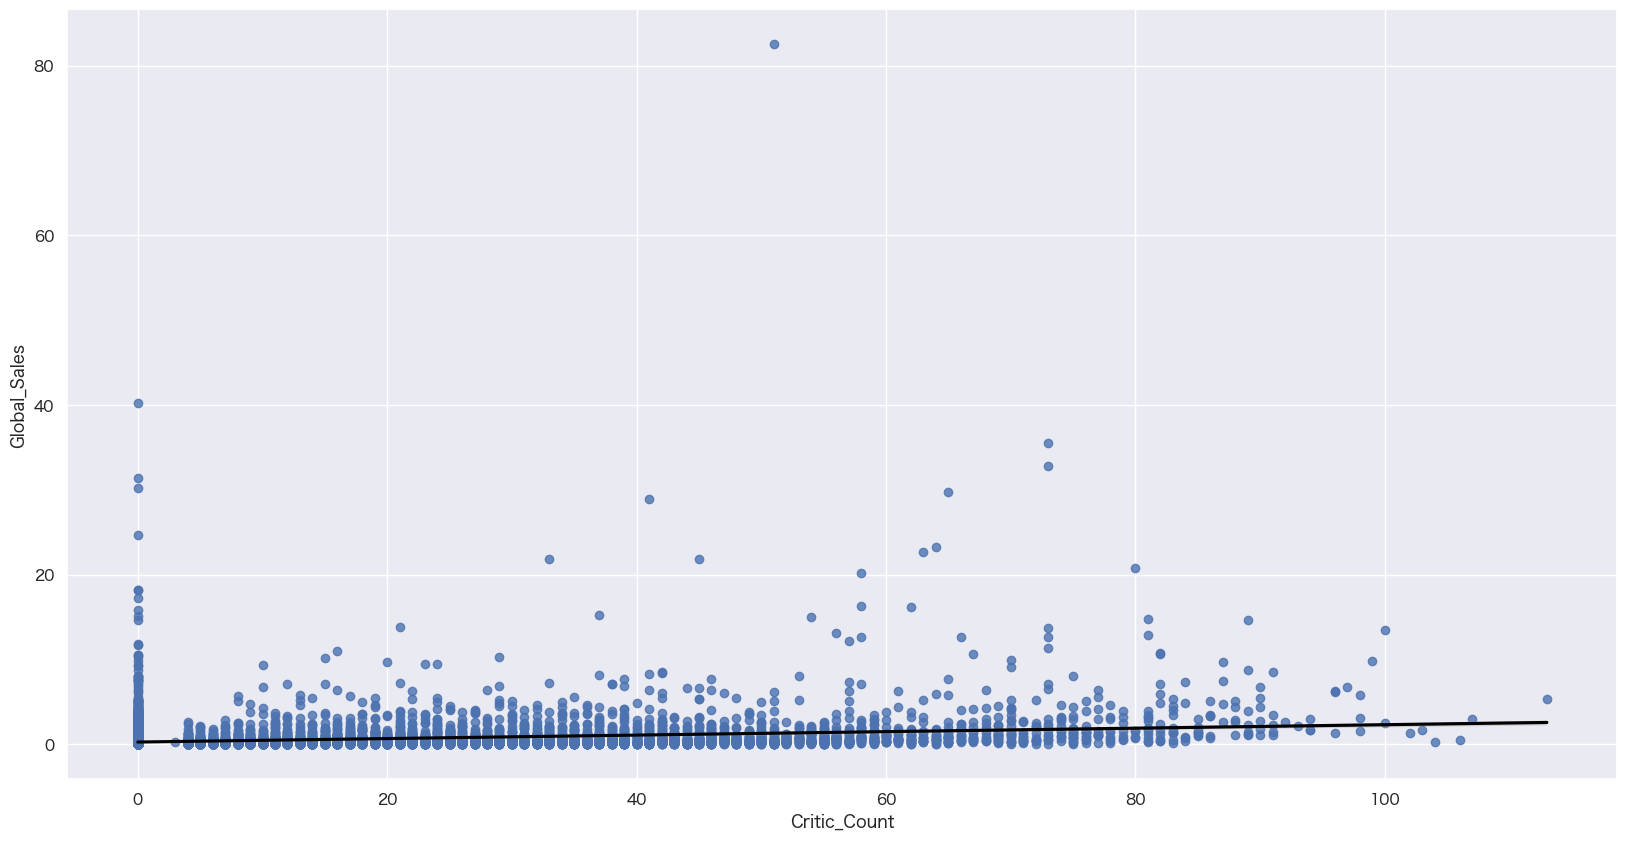

In [58]:
## 2-8.Critic_Count
fig = plt.subplots(figsize=(20,10))
df_critic = train[["Critic_Count","Global_Sales"]].fillna(0)
sns.regplot(x="Critic_Count",y="Global_Sales",data=df_critic,line_kws={"color":"black"})

# 相関係数の算出 + 検定の実施
from scipy import stats
stats.pearsonr(train["Critic_Count"].fillna(0),train["Global_Sales"].fillna(0))

# 欠損のデータはレビューのないデータであることが推察されるため、0を代入
# 今回はそこまでしかないが、レビュー数 × レビュースコアで新しい特徴量を作るのもあり

# ３.機械学習の前処理

In [59]:
# 機械学習用のデータフレームを作成
df_train = train.copy()
df_test = test.copy()

# indexは削除
df_train = df_train.drop("index",axis=1)

# Name 欠損を削除 nameは今回は使わない
df_train = df_train.dropna(subset=["Name"])
df_train = df_train.drop("Name",axis=1)
df_test = df_test.drop("Name",axis=1)

# Platform 欠損をカテゴリー化して後でtarget encodingを行う
df_train["Platform"] = df_train["Platform"].apply(lambda x: "unknown" if x != x else x)
df_test["Platform"] = df_test["Platform"].apply(lambda x: "unknown" if x != x else x)

# year_of_Release year<=1990 ,1990<year<1994, 1994<=year,na,でダミー変数か(1994<=yearをベースに)
df_train["Year_of_Release <= 1990"] = df_train["Year_of_Release"].apply(lambda x: 1 if x <= 1990 else 0)
df_train["Year_of_Release < 1994"] = df_train["Year_of_Release"].apply(lambda x: 1 if x < 1994 else 0)
df_train["year_of_Release_na"] = df_train["Year_of_Release"].apply(lambda x: 1 if x != x else 0)
df_train = df_train.drop("Year_of_Release",axis=1)
df_test["Year_of_Release <= 1990"] = df_test["Year_of_Release"].apply(lambda x: 1 if x <= 1990 else 0)
df_test["Year_of_Release < 1994"] = df_test["Year_of_Release"].apply(lambda x: 1 if x < 1994 else 0)
df_test["year_of_Release_na"] = df_test["Year_of_Release"].apply(lambda x: 1 if x != x else 0)
df_test = df_test.drop("Year_of_Release",axis=1)

# Genreダミー化 (一番数の多いActionをbaseにone-hot encoding)
df_train["Genre_Racing"] = df_train["Genre"].apply(lambda x: 1 if x == "Racing" else 0)
df_train["Genre_Misc"] = df_train["Genre"].apply(lambda x: 1 if x == "Misc" else 0)
df_train["Genre_Adventure"] = df_train["Genre"].apply(lambda x: 1 if x == "Adventure" else 0)
df_train["Genre_Platform"] = df_train["Genre"].apply(lambda x: 1 if x == "Platform" else 0)
df_train["Genre_Simulation"] = df_train["Genre"].apply(lambda x: 1 if x == "Simulation" else 0)
df_train["Genre_Shooter"] = df_train["Genre"].apply(lambda x: 1 if x == "Shooter" else 0)
df_train["Genre_Role-Playing"] = df_train["Genre"].apply(lambda x: 1 if x == "Role-Playing" else 0)
df_train["Genre_Action"] = df_train["Genre"].apply(lambda x: 1 if x == "Action" else 0)
df_train["Genre_Puzzle"] = df_train["Genre"].apply(lambda x: 1 if x == "Puzzle" else 0)
df_train["Genre_Fighting"] = df_train["Genre"].apply(lambda x: 1 if x == "Fighting" else 0)
df_train["Genre_Sports"] = df_train["Genre"].apply(lambda x: 1 if x == "Sports" else 0)
df_train["Genre_Strategy"] = df_train["Genre"].apply(lambda x: 1 if x == "Strategy" else 0)
df_train["Genre_na"] = df_train["Genre"].apply(lambda x: 1 if x != x else 0)
df_train = df_train.drop("Genre",axis=1)
df_test["Genre_Racing"] = df_test["Genre"].apply(lambda x: 1 if x == "Racing" else 0)
df_test["Genre_Misc"] = df_test["Genre"].apply(lambda x: 1 if x == "Misc" else 0)
df_test["Genre_Adventure"] = df_test["Genre"].apply(lambda x: 1 if x == "Adventure" else 0)
df_test["Genre_Platform"] = df_test["Genre"].apply(lambda x: 1 if x == "Platform" else 0)
df_test["Genre_Simulation"] = df_test["Genre"].apply(lambda x: 1 if x == "Simulation" else 0)
df_test["Genre_Shooter"] = df_test["Genre"].apply(lambda x: 1 if x == "Shooter" else 0)
df_test["Genre_Role-Playing"] = df_test["Genre"].apply(lambda x: 1 if x == "Role-Playing" else 0)
df_test["Genre_Action"] = df_test["Genre"].apply(lambda x: 1 if x == "Action" else 0)
df_test["Genre_Puzzle"] = df_test["Genre"].apply(lambda x: 1 if x == "Puzzle" else 0)
df_test["Genre_Fighting"] = df_test["Genre"].apply(lambda x: 1 if x == "Fighting" else 0)
df_test["Genre_Sports"] = df_test["Genre"].apply(lambda x: 1 if x == "Sports" else 0)
df_test["Genre_Strategy"] = df_test["Genre"].apply(lambda x: 1 if x == "Strategy" else 0)
df_test["Genre_na"] = df_test["Genre"].apply(lambda x: 1 if x != x else 0)
df_test = df_test.drop("Genre",axis=1)

# Publisher 欠損をカテゴリー化して、後でtarget encodingを行う
df_train["Publisher"] = df_train["Publisher"].apply(lambda x: "unknown" if x != x else x)
df_test["Publisher"] = df_test["Publisher"].apply(lambda x: "unknown" if x != x else x)

# Jp_Sales 処理なし

# Critic_Score 欠損値に平均値代入 + 欠損か否かの変数を追加
df_train["Critic_Score_na"] = df_train["Critic_Score"].apply(lambda x :1 if x != x else 0)
df_train["Critic_Score"] = df_train["Critic_Score"].fillna(df_train["Critic_Score"].mean())
df_test["Critic_Score_na"] = df_test["Critic_Score"].apply(lambda x :1 if x != x else 0)
df_test["Critic_Score"] = df_test["Critic_Score"].fillna(df_test["Critic_Score"].mean())


# Critic_Count 欠損値に0を代入
df_train["Critic_Count"] = df_train["Critic_Count"].fillna(0)
df_test["Critic_Count"] = df_test["Critic_Count"].fillna(0)

# データの確認
display(df_train.info())
display(df_train.describe())
display(df_test.info())
display(df_test.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 13373 entries, 0 to 13374
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Platform                 13373 non-null  object 
 1   Publisher                13373 non-null  object 
 2   JP_Sales                 13373 non-null  float64
 3   Critic_Score             13373 non-null  float64
 4   Critic_Count             13373 non-null  float64
 5   Global_Sales             13373 non-null  float64
 6   Year_of_Release <= 1990  13373 non-null  int64  
 7   Year_of_Release < 1994   13373 non-null  int64  
 8   year_of_Release_na       13373 non-null  int64  
 9   Genre_Racing             13373 non-null  int64  
 10  Genre_Misc               13373 non-null  int64  
 11  Genre_Adventure          13373 non-null  int64  
 12  Genre_Platform           13373 non-null  int64  
 13  Genre_Simulation         13373 non-null  int64  
 14  Genre_Shooter            13

None

,JP_Sales,Critic_Score,Critic_Count,Global_Sales,Year_of_Release <= 1990,Year_of_Release < 1994,year_of_Release_na,Genre_Racing,Genre_Misc,Genre_Adventure,Genre_Platform,Genre_Simulation,Genre_Shooter,Genre_Role-Playing,Genre_Action,Genre_Puzzle,Genre_Fighting,Genre_Sports,Genre_Strategy,Genre_na,Critic_Score_na
count,13373.000000,13373.000000,13373.000000,13373.000000,13373.000000,13373.000000,13373.000000,13373.000000,13373.000000,13373.000000,13373.00000,13373.000000,13373.000000,13373.000000,13373.000000,13373.000000,13373.000000,13373.000000,13373.000000,13373.0,13373.000000
mean,0.078269,68.955449,12.820235,0.532560,0.013610,0.022433,0.015255,0.073058,0.103941,0.077694,0.05384,0.051970,0.080610,0.089583,0.201226,0.034921,0.051372,0.141479,0.040305,0.0,0.514918
std,0.313621,9.709835,18.632704,1.580569,0.115868,0.148093,0.122569,0.260241,0.305195,0.267699,0.22571,0.221976,0.272246,0.285595,0.400932,0.183587,0.220764,0.348528,0.196681,0.0,0.499796
min,0.000000,13.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,68.955449,0.000000,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,0.000000,68.955449,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
75%,0.040000,70.000000,21.000000,0.470000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
max,10.220000,98.000000,113.000000,82.530000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3344 entries, 0 to 3343
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    3344 non-null   int64  
 1   Platform                 3344 non-null   object 
 2   Publisher                3344 non-null   object 
 3   JP_Sales                 3344 non-null   float64
 4   Critic_Score             3344 non-null   float64
 5   Critic_Count             3344 non-null   float64
 6   Year_of_Release <= 1990  3344 non-null   int64  
 7   Year_of_Release < 1994   3344 non-null   int64  
 8   year_of_Release_na       3344 non-null   int64  
 9   Genre_Racing             3344 non-null   int64  
 10  Genre_Misc               3344 non-null   int64  
 11  Genre_Adventure          3344 non-null   int64  
 12  Genre_Platform           3344 non-null   int64  
 13  Genre_Simulation         3344 non-null   int64  
 14  Genre_Shooter           

None

,index,JP_Sales,Critic_Score,Critic_Count,Year_of_Release <= 1990,Year_of_Release < 1994,year_of_Release_na,Genre_Racing,Genre_Misc,Genre_Adventure,Genre_Platform,Genre_Simulation,Genre_Shooter,Genre_Role-Playing,Genre_Action,Genre_Puzzle,Genre_Fighting,Genre_Sports,Genre_Strategy,Genre_na,Critic_Score_na
count,3344.000000,3344.000000,3344.000000,3344.000000,3344.000000,3344.000000,3344.000000,3344.000000,3344.000000,3344.000000,3344.000000,3344.000000,3344.000000,3344.000000,3344.00000,3344.000000,3344.000000,3344.000000,3344.000000,3344.0,3344.000000
mean,8330.657895,0.074973,69.015758,12.874701,0.011663,0.019438,0.019438,0.081340,0.107656,0.078947,0.050239,0.053529,0.073266,0.090311,0.20305,0.033792,0.048445,0.136364,0.043062,0.0,0.506579
std,4798.349977,0.288938,9.781820,18.872595,0.107378,0.138079,0.138079,0.273397,0.309991,0.269697,0.218471,0.225119,0.260611,0.286670,0.40233,0.180720,0.214737,0.343226,0.203028,0.0,0.500031
min,8.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4184.000000,0.000000,69.015758,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,8313.500000,0.000000,69.015758,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
75%,12475.000000,0.030000,71.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
max,16718.000000,7.200000,98.000000,105.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


In [60]:
# 説明変数と目的変数に分割
X = df_train.drop("Global_Sales",axis=1)
y = df_train["Global_Sales"]

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=1)

# X_trainとY_trainを用いて各カテゴリーの平均Global_Salesを算出、~_scoreとしてmergeする(数の少ないNameはリークの恐れがあるため3段階に分ける)
df_target = pd.merge(X_train,y_train,left_index=True,right_index=True)[["Platform","Publisher","Global_Sales"]]

df_target_platform = (df_target.groupby("Platform", as_index=False)["Global_Sales"].mean().rename(columns={"Global_Sales": "Platform_Score"}))
# df_target_platform = df_target.groupby("Platform",as_index=False).mean().rename(columns={"Global_Sales":"Platform_Score"})

df_target_publisher = (df_target.groupby("Publisher", as_index=False)["Global_Sales"].mean().rename(columns={"Global_Sales": "Publisher_Score"}))
# df_target_publisher = df_target.groupby("Publisher",as_index=False).mean().rename(columns={"Global_Sales":"Platform_Score"})

X_train = pd.merge(X_train,df_target_platform,on="Platform",how="left")
X_train = pd.merge(X_train,df_target_publisher,on="Publisher",how="left")
X_train = X_train.drop(["Platform","Publisher"],axis=1)
X_test = pd.merge(X_test,df_target_platform,on="Platform",how="left")
X_test = pd.merge(X_test,df_target_publisher,on="Publisher",how="left")
X_test = X_test.drop(["Platform","Publisher"],axis=1)

#trainデータにないカテゴリーは中央値で埋める
X_train["Platform_Score"] = X_train["Platform_Score"].fillna(X_train["Platform_Score"].median())
X_train["Publisher_Score"] = X_train["Publisher_Score"].fillna(X_train["Publisher_Score"].median())
X_test["Platform_Score"] = X_test["Platform_Score"].fillna(X_test["Platform_Score"].median())
X_test["Publisher_Score"] = X_test["Publisher_Score"].fillna(X_test["Publisher_Score"].median())


display(X_train.info())
display(X_test.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10698 entries, 0 to 10697
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   JP_Sales                 10698 non-null  float64
 1   Critic_Score             10698 non-null  float64
 2   Critic_Count             10698 non-null  float64
 3   Year_of_Release <= 1990  10698 non-null  int64  
 4   Year_of_Release < 1994   10698 non-null  int64  
 5   year_of_Release_na       10698 non-null  int64  
 6   Genre_Racing             10698 non-null  int64  
 7   Genre_Misc               10698 non-null  int64  
 8   Genre_Adventure          10698 non-null  int64  
 9   Genre_Platform           10698 non-null  int64  
 10  Genre_Simulation         10698 non-null  int64  
 11  Genre_Shooter            10698 non-null  int64  
 12  Genre_Role-Playing       10698 non-null  int64  
 13  Genre_Action             10698 non-null  int64  
 14  Genre_Puzzle          

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2675 entries, 0 to 2674
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   JP_Sales                 2675 non-null   float64
 1   Critic_Score             2675 non-null   float64
 2   Critic_Count             2675 non-null   float64
 3   Year_of_Release <= 1990  2675 non-null   int64  
 4   Year_of_Release < 1994   2675 non-null   int64  
 5   year_of_Release_na       2675 non-null   int64  
 6   Genre_Racing             2675 non-null   int64  
 7   Genre_Misc               2675 non-null   int64  
 8   Genre_Adventure          2675 non-null   int64  
 9   Genre_Platform           2675 non-null   int64  
 10  Genre_Simulation         2675 non-null   int64  
 11  Genre_Shooter            2675 non-null   int64  
 12  Genre_Role-Playing       2675 non-null   int64  
 13  Genre_Action             2675 non-null   int64  
 14  Genre_Puzzle            

None

<Axes: >

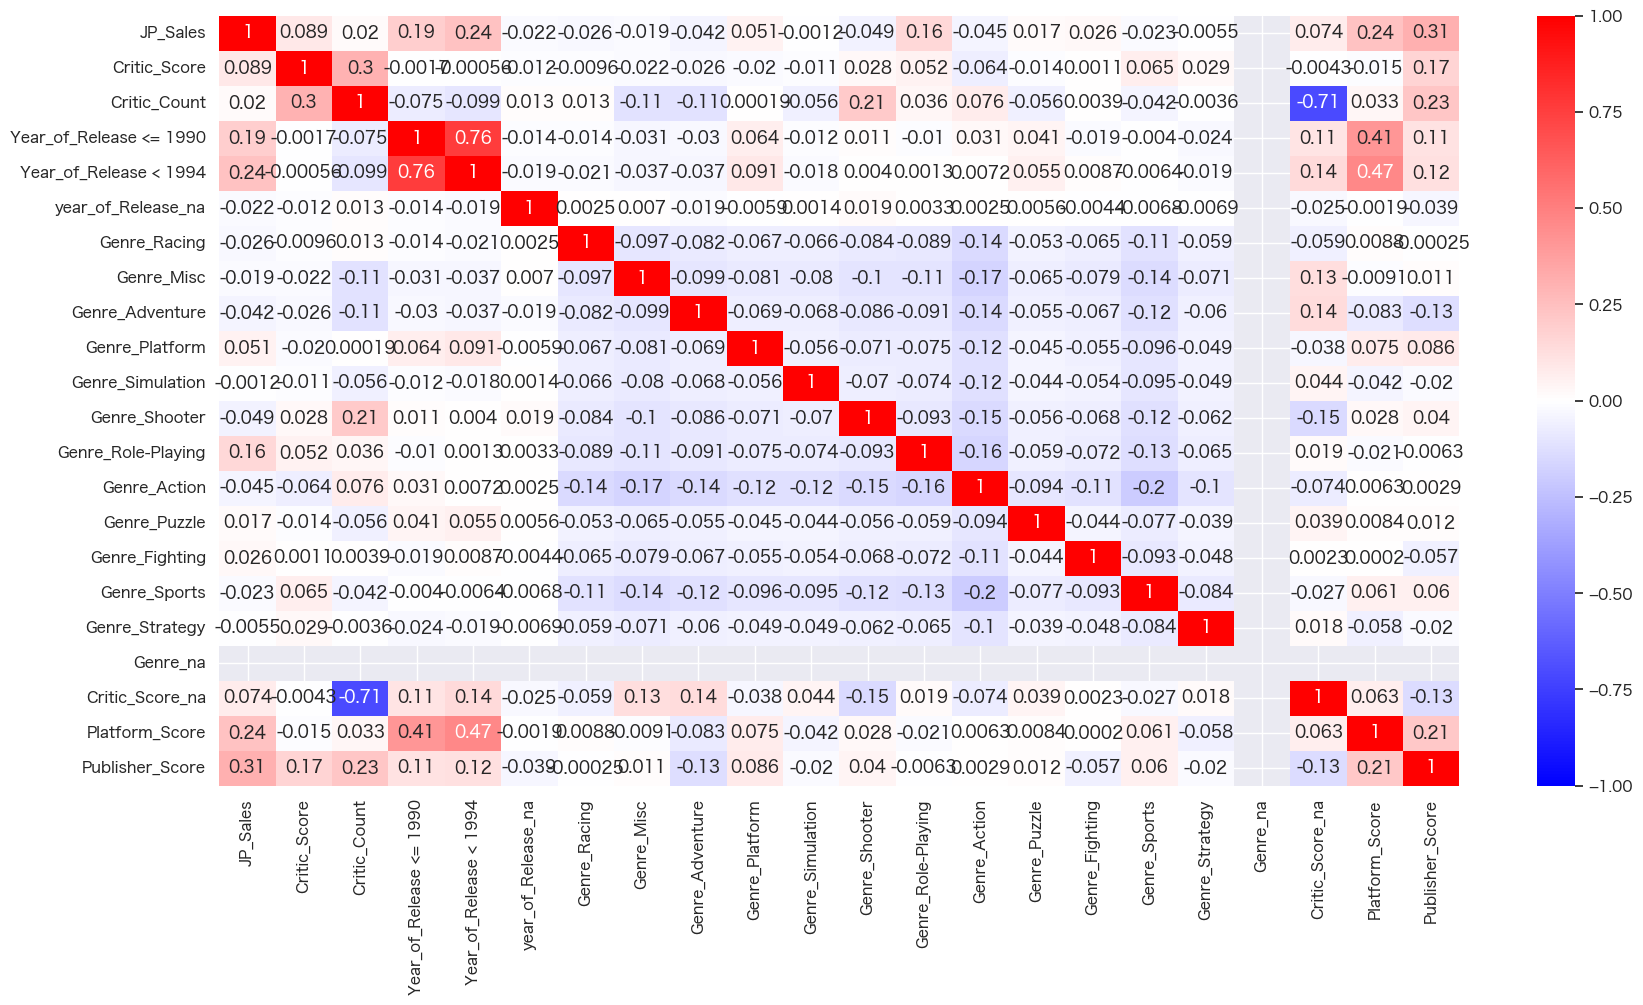

In [62]:
# 相関行列を作成
fig = plt.subplots(figsize=(20,10))
sns.heatmap(X_train.corr(),cmap="bwr",annot=True,vmax=1,vmin=-1,center=0)
# 多重平均性は問題なさそう

# 4.予測と評価

In [63]:
# 重回帰(sklearn)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

# スコア算出
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("r2=",r2_score(y_true=y_test,y_pred=y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred)))
print("MAE=",mean_absolute_error(y_true=y_test,y_pred=y_pred))
pd.DataFrame(lr.coef_,index=X_train.columns)


r2= 0.42663034387182386
RMSE 1.6558980069091283
MAE= 0.47977252883653054


,0
JP_Sales,2.722835e+00
Critic_Score,1.374375e-02
Critic_Count,1.590637e-02
Year_of_Release <= 1990,4.682745e-01
Year_of_Release < 1994,-4.955650e-01
year_of_Release_na,-2.193888e-03
Genre_Racing,1.483746e-01
Genre_Misc,8.263835e-02
Genre_Adventure,-3.511792e-02
Genre_Platform,1.486516e-01


In [64]:
# 標準化偏回帰係数を確認

# 標準化
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_train_std = pd.DataFrame(X_train_std,columns=X_train.columns)
X_test_std = ss.transform(X_test)
X_test_std = pd.DataFrame(X_test_std,columns=X_test.columns)
lr2 = LinearRegression()
lr2.fit(X_train_std,y_train)
y_pred = lr2.predict(X_test_std)

# 標準化偏回帰係数を算出
pd.DataFrame(lr2.coef_,index=X_train_std.columns)

# JP_Sales,Critic系が予測に寄与


,0
JP_Sales,8.056199e-01
Critic_Score,1.337039e-01
Critic_Count,2.981935e-01
Year_of_Release <= 1990,5.321729e-02
Year_of_Release < 1994,-7.308906e-02
year_of_Release_na,-2.695444e-04
Genre_Racing,3.495737e-02
Genre_Misc,2.076721e-02
Genre_Adventure,-1.339199e-02
Genre_Platform,3.007360e-02


In [65]:
#ベースラインモデル 全体の平均値を代入して予測
y_pred = [np.mean(y_train)] * len(y_test)
print("RMSE=",np.sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred)))

# 重回帰モデルのスコアがベースラインモデルを上回っていることを確認

RMSE= 2.187404780413172


In [66]:
# 決定木分析
from sklearn import tree
clf = tree.DecisionTreeRegressor(random_state=1,max_depth=9) # max_depthを指定
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

# スコア算出
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print("r2=",r2_score(y_true=y_test,y_pred=y_pred))
print("RMSE=",np.sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred)))
print("MAE=",mean_absolute_error(y_true=y_test,y_pred=y_pred))
pd.DataFrame(clf.feature_importances_,index=X_train.columns)

# rmseがより低い決定木モデルを採用
# JP_Sales,Critic系が予測に寄与

r2= 0.49464242529804847
RMSE= 1.5545891077553287
MAE= 0.4082868049074457


,0
JP_Sales,0.545769
Critic_Score,0.133036
Critic_Count,0.096246
Year_of_Release <= 1990,0.000443
Year_of_Release < 1994,0.000259
year_of_Release_na,0.000018
Genre_Racing,0.003514
Genre_Misc,0.003537
Genre_Adventure,0.000000
Genre_Platform,0.004741


In [67]:
# 誤差の多かったデータと誤差の少なかったデータで比較を行う
X_test["y_pred"] = y_pred
X_test["y_true"] = np.array(y_test)
X_test["error"] = X_test["y_pred"] - X_test["y_true"]
X_test["abs_error"] = abs(X_test["y_pred"] - X_test["y_true"])
display(X_test.sort_values("abs_error",ascending=False).head(10))
display(X_test.sort_values("abs_error",ascending=True).head(10))

# Critic_CountやPublisher_Scoreが高いものの誤差が大きくなりがちか？


,JP_Sales,Critic_Score,Critic_Count,Year_of_Release <= 1990,Year_of_Release < 1994,year_of_Release_na,Genre_Racing,Genre_Misc,Genre_Adventure,Genre_Platform,Genre_Simulation,Genre_Shooter,Genre_Role-Playing,Genre_Action,Genre_Puzzle,Genre_Fighting,Genre_Sports,Genre_Strategy,Genre_na,Critic_Score_na,Platform_Score,Publisher_Score,y_pred,y_true,error,abs_error
2534,3.77,76.000000,51.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.639468,2.271166,22.566667,82.53,-59.963333,59.963333
1101,2.93,58.000000,41.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.639468,2.271166,8.570000,28.92,-20.350000,20.350000
1627,2.69,85.000000,73.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.463494,2.271166,32.770000,12.66,20.110000,20.110000
1175,10.22,68.955449,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2.101667,2.271166,15.140000,31.37,-16.230000,16.230000
374,0.07,83.000000,73.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.759558,0.762593,1.999600,13.67,-11.670400,11.670400
1387,6.50,89.000000,65.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.377434,2.271166,40.240000,29.80,10.440000,10.440000
2510,0.18,60.000000,34.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.639468,2.271166,10.073333,0.92,9.153333,9.153333
1759,0.02,68.955449,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.759558,1.325304,1.229667,9.18,-7.950333,7.950333
1942,0.00,68.955449,0.0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0.715854,0.381405,0.482087,7.81,-7.327913,7.327913
1502,3.15,68.955449,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.356157,2.271166,3.280000,10.49,-7.210000,7.210000


,JP_Sales,Critic_Score,Critic_Count,Year_of_Release <= 1990,Year_of_Release < 1994,year_of_Release_na,Genre_Racing,Genre_Misc,Genre_Adventure,Genre_Platform,Genre_Simulation,Genre_Shooter,Genre_Role-Playing,Genre_Action,Genre_Puzzle,Genre_Fighting,Genre_Sports,Genre_Strategy,Genre_na,Critic_Score_na,Platform_Score,Publisher_Score,y_pred,y_true,error,abs_error
1615,0.00,82.000000,12.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.237902,0.841250,0.280200,0.28,0.000200,0.000200
1793,0.00,82.000000,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.289213,0.840105,0.280200,0.28,0.000200,0.000200
1132,0.00,68.955449,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0.119458,0.044286,0.031214,0.03,0.001214,0.001214
1969,0.03,68.955449,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.178981,0.045000,0.031214,0.03,0.001214,0.001214
1754,0.00,68.955449,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.759558,0.020000,0.031214,0.03,0.001214,0.001214
657,0.00,68.955449,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.622117,0.013333,0.031214,0.03,0.001214,0.001214
2627,0.03,68.955449,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.237902,0.031667,0.031214,0.03,0.001214,0.001214
1913,0.03,68.955449,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.237902,0.017500,0.031214,0.03,0.001214,0.001214
1582,0.03,68.955449,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.237902,0.030233,0.031214,0.03,0.001214,0.001214
2270,0.00,68.955449,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.289213,0.040000,0.031214,0.03,0.001214,0.001214


<Axes: xlabel='error', ylabel='Count'>

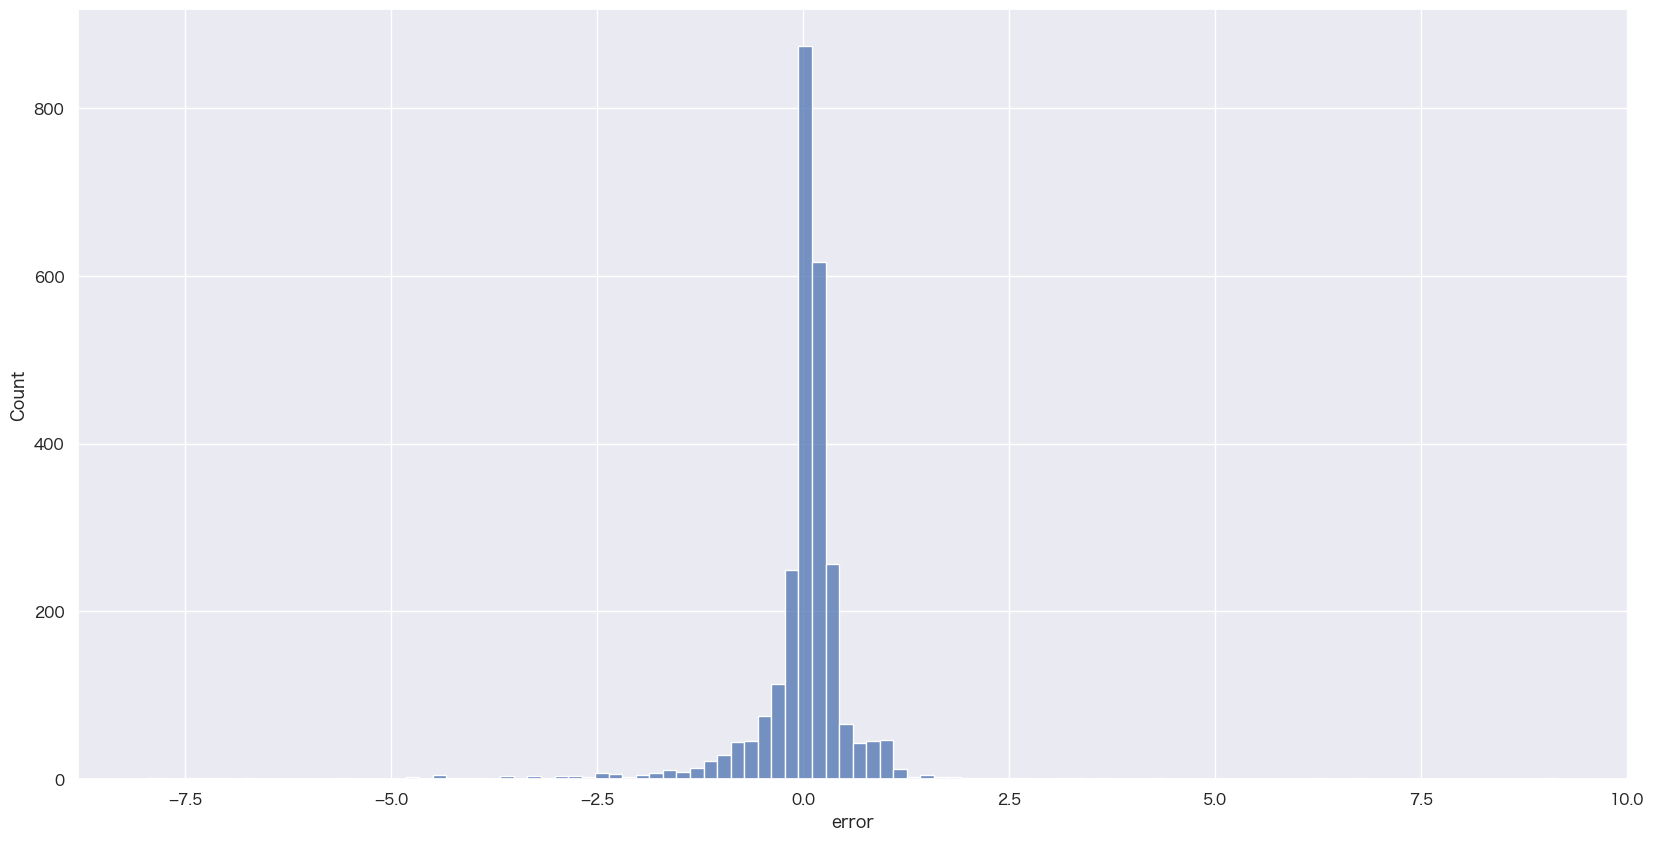

In [68]:
# 誤差の分布を確認
fig = plt.subplots(figsize=(20,10))
sns.histplot(X_test.query('abs_error < 10')['error'],kde=False)

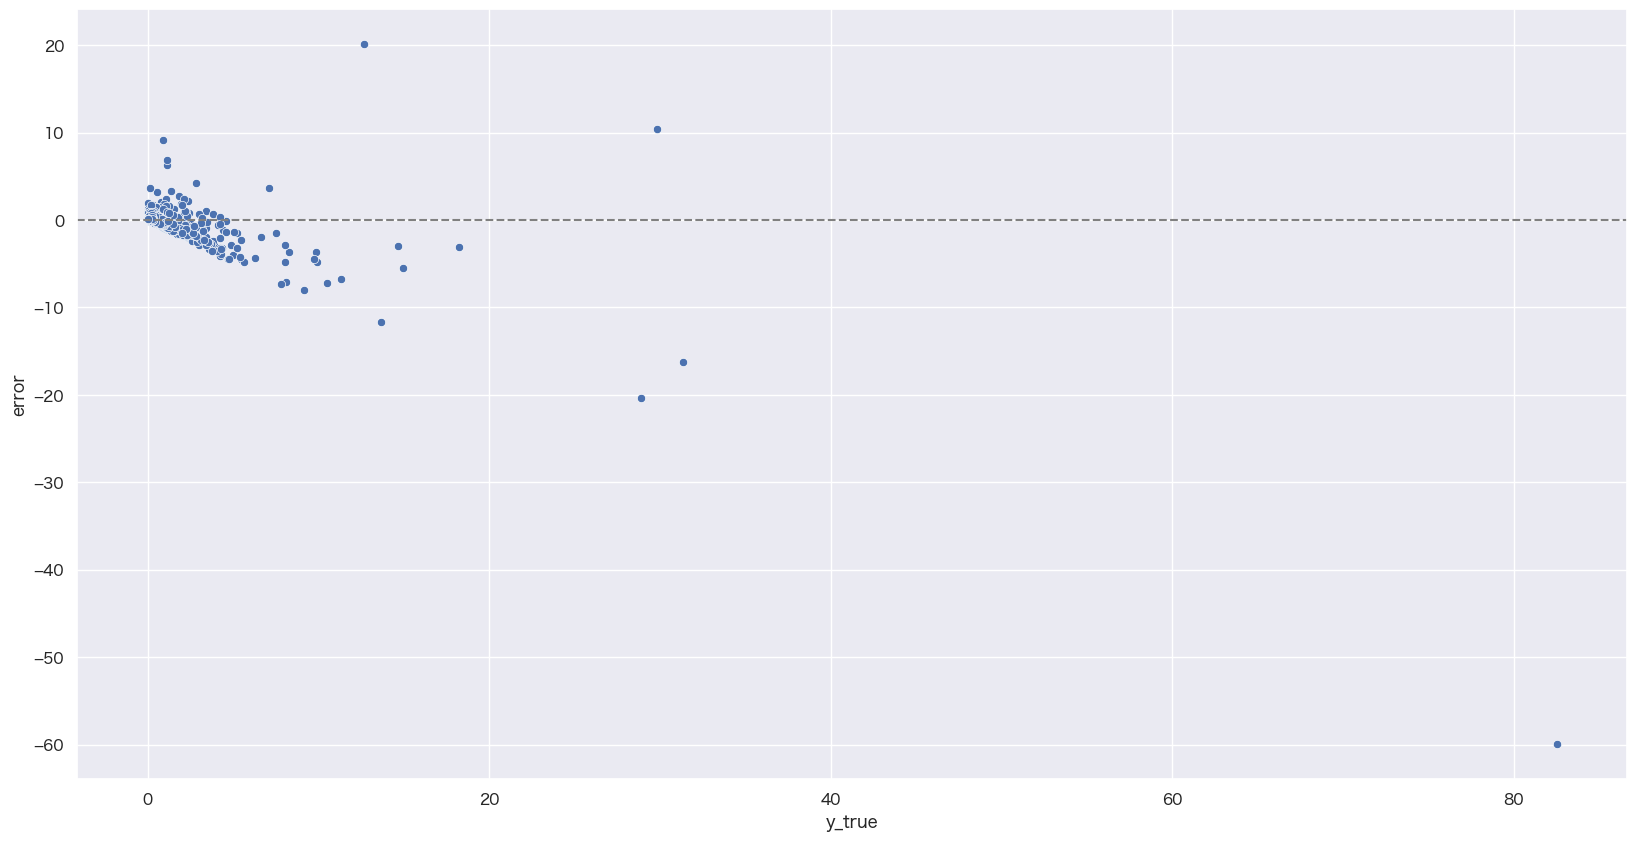

In [69]:
# 誤差とGlobal_Salesの関係性を確認
fig = plt.subplots(figsize=(20,10))
sns.scatterplot(x="y_true",y="error",data=X_test)
plt.axhline(y=0,c="gray",linestyle="--")

# 高く浦田ものを低く予測しすぎているのが問題、高く売れるものの特徴量作成が不十分なためEDAをもっとする必要がある

In [78]:
# submit用の予測モデルを作成するために、trainデータ全てを使用して再学習を実行
df_target = df_train[["Platform","Publisher","Global_Sales"]]
#df_target_platform = df_target.groupby("Platform",as_index=False).mean().rename(columns={"Global_Sales":"Platform_Score"})

df_target_platform = df_target.groupby("Platform", as_index=False)["Global_Sales"].mean().rename(columns={"Global_Sales":"Platform_Score"})

df_target_publisher = df_target.groupby("Publisher",as_index=False)["Global_Sales"].mean().rename(columns={"Global_Sales":"Publisher_Score"})


X = pd.merge(X,df_target_platform,on="Platform",how="left")
X = pd.merge(X,df_target_publisher,on="Publisher",how="left")
# X = X.drop(["Platform","Publisher"],axis=1)
# df_test = pd.merge(df_test,df_target_platform,on="Platform",how="left")
# df_test = pd.merge(df_test,df_target_publisher,on="Publisher",how="left")
# df_test = df_test.drop(["Platform","Publisher"],axis=1)

# X["Platform_Score"] = X["Platform_Score"].fillna(X["Platform_Score"].median())
# X["Publisher_Score"] = X["Publisher_Score"].fillna(X["Publisher_Score"].median())
# df_test["Platform_Score"] = df_test["Platform_Score"].fillna(df_test["Platform_Score"].median())
# df_test["Publisher_Score"] = df_test["Publisher_Score"].fillna(df_test["Publisher_Score"].median())

# clf = tree.DecisionTreeRegressor(random_state=1,max_depth=9) # max_depthを指定
# clf = clf.fit(X,y)




KeyError: 'Platform'

In [76]:
# #submit用の予測モデルを作るためにtrainデータ全てを使用して再学習を実行
# df_target = df_train[["Platform", "Publisher", "Global_Sales"]]

# # df_target_platform = df_target.groupby("Platform", as_index=False).mean().rename(columns={"Global_Sales": "Platform_Score"})
# # df_target_publisher = df_target.groupby("Publisher", as_index=False).mean().rename(columns={"Global_Sales": "Publisher_Score"})

# df_target_platform = df_target.groupby("Platform", as_index=False)["Global_Sales"].mean().rename(columns={"Global_Sales":"Platform_Score"})

# df_target_publisher = df_target.groupby("Publisher",as_index=False)["Global_Sales"].mean().rename(columns={"Global_Sales":"Publisher_Score"})


# X = pd.merge(X, df_target_platform, on="Platform", how="left")
# X = pd.merge(X, df_target_publisher, on="Publisher", how="left")
# X = X.drop(["Platform", "Publisher"], axis=1)
# df_test = pd.merge(df_test, df_target_platform, on="Platform", how="left")
# df_test = pd.merge(df_test, df_target_publisher, on="Publisher", how="left")
# df_test = df_test.drop(["Platform", "Publisher"], axis=1)

# X["Platform_Score"] = X["Platform_Score"].fillna(X["Platform_Score"].median())
# X["Publisher_Score"] = X["Publisher_Score"].fillna(X["Publisher_Score"].median())
# df_test["Platform_Score"] = df_test["Platform_Score"].fillna(X["Platform_Score"].median())
# df_test["Publisher_Score"] = df_test["Publisher_Score"].fillna(X["Publisher_Score"].median())

# clf = tree.DecisionTreeRegressor(random_state=1, max_depth=9) #max_depthを指定
# clf = clf.fit(X, y)

In [81]:
clf = tree.DecisionTreeRegressor(random_state=1, max_depth=9)
clf.fit(X, y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,9
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [85]:
# 作成したモデルでsubmitデータを予測
X_test = df_test.drop("index",axis=1)
pred = clf.predict(X_test)
df_test["y"] = pred
test_data = df_test[["index","y"]].set_index("index")
test_data.to_csv("submit.csv",index=True)
test_data

# 最終スコア 1.06

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- y
